## Data Importing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('EtownQAData.csv', )

In [6]:
data.head()

,Question,Answer,Class,Long_Answer
0,When was Elizabethtown College first opened?,1899,1,Etown was first opened in 1899.
1,When was Etown opened?,1899,1,Etown was opened in 1899.
2,Who originally founded Elizabethtown College?,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,Who founded Etown?,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,When was Elizabethtown College originally foun...,1899,1,Etown was founded in 1899.


## Data Cleaning

In [7]:
import re
import string

In [8]:
def clean_text(text):
    '''
    Make text lowercase, 
    remove text in square brackets, 
    remove punctuation and 
    remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[’‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [9]:
data['Question'] = data['Question'].apply(clean_text)

data

,Question,Answer,Class,Long_Answer
0,when was elizabethtown college first opened,1899,1,Etown was first opened in 1899.
1,when was etown opened,1899,1,Etown was opened in 1899.
2,who originally founded elizabethtown college,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,who founded etown,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,when was elizabethtown college originally founded,1899,1,Etown was founded in 1899.
...,...,...,...,...
350,is elizabethtown college a college or a univer...,Elizabethtown College is a college,1,NaN
351,what year was elizabethtown college opened,1899,1,NaN
352,when was elizabethtown college officially opened,1899,1,NaN
353,what is the best thing elizabethtown college h...,The academics at Elizabethtown College are exc...,12,NaN


In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
# Download necessary nltk resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
stop_words = list(stopwords.words('english')) 

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# Add our own stop words

stop_words.append('elizabethtown')
stop_words.append('college')
stop_words.append('etown')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
def remove_stop_words(sent):
    words = word_tokenize(sent)
    sent = ' '.join(str(j) for j in words if j not in stop_words and (len(j) != 1))
    
    return sent

In [18]:
data['Question'] = data['Question'].apply(remove_stop_words)

data

,Question,Answer,Class,Long_Answer
0,first opened,1899,1,Etown was first opened in 1899.
1,opened,1899,1,Etown was opened in 1899.
2,originally founded,Reverend Jacob G. Francis in 1899,1,Etown was founded by Reverend Jacob G. Francis...
3,founded,Reverend Jacob G. Francis in 1899,1,Reverend Jacob G. Francis founded Etown in 1899.
4,originally founded,1899,1,Etown was founded in 1899.
...,...,...,...,...
350,university,Elizabethtown College is a college,1,NaN
351,year opened,1899,1,NaN
352,officially opened,1899,1,NaN
353,best thing offer,The academics at Elizabethtown College are exc...,12,NaN


In [19]:
import itertools

In [20]:
df = pd.DataFrame(list(itertools.combinations(data['Question'], 2)))

df

,0,1
0,first opened,opened
1,first opened,originally founded
2,first opened,founded
3,first opened,originally founded
4,first opened,founded
...,...,...
62830,year opened,best thing offer
62831,year opened,part pennsylvania
62832,officially opened,best thing offer
62833,officially opened,part pennsylvania


In [21]:
def label_question(index_question):
    return list(data.loc[data['Question'] == index_question]['Class'])[0]

In [22]:
# Add labels to df
df['label_0'] = df[0].apply(label_question)
df['label_1'] = df[1].apply(label_question)

df

,0,1,label_0,label_1
0,first opened,opened,1,1
1,first opened,originally founded,1,1
2,first opened,founded,1,1
3,first opened,originally founded,1,1
4,first opened,founded,1,1
...,...,...,...,...
62830,year opened,best thing offer,1,12
62831,year opened,part pennsylvania,1,3
62832,officially opened,best thing offer,1,12
62833,officially opened,part pennsylvania,1,3


In [23]:
def label(label_0, label_1):
  return 1 if label_0 == label_1 else 0

In [24]:
df['y_true'] = df.apply(lambda x: label(x['label_0'], x['label_1']), axis=1)

In [25]:
df.to_pickle('question_pairs.pkl') # Export data as pkl file

## EDA
Let's check what our training data looks like with a count plot of words

In [26]:
words = []

def add_words(sent):
    for i in sent.split(): words.append(i)
    
data['Question'].apply(add_words)

0      None
1      None
2      None
3      None
4      None
       ... 
350    None
351    None
352    None
353    None
354    None
Name: Question, Length: 355, dtype: object

In [27]:
words_df = pd.DataFrame(words)

words_df

,0
0,first
1,opened
2,opened
3,originally
4,founded
...,...
914,best
915,thing
916,offer
917,part


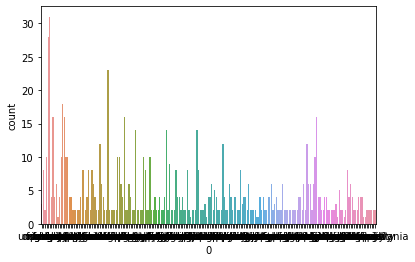

In [28]:
sns.countplot(data=words_df, x=0)

The counts do not seem to be drastically biased

## Embedding Setup

In [30]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [31]:
df['text'] = df[[0,1]].apply(lambda x:str(x[0])+" "+str(x[1]), axis=1)

In [32]:
from keras.preprocessing.text import Tokenizer

In [65]:
t = Tokenizer()
t.fit_on_texts(df['text'].values)

In [34]:
not_present_list = []
vocab_size = len(t.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, len(embeddings_index['no'])))
for word, i in t.word_index.items():
    if word in embeddings_index.keys():
        embedding_vector = embeddings_index.get(word)
    else:
        not_present_list.append(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.zeros(300)

Loaded 400000 word vectors.


In [35]:
embedding_matrix.shape

(208, 300)

In [36]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.45381001, -0.0073266 ,  0.27498001, ..., -0.32387   ,
        -0.25544   , -0.19268   ],
       [-0.15507001,  0.28422001,  0.31191   , ..., -0.54562002,
        -0.14735   , -0.31492999],
       ...,
       [-0.1724    , -0.44104001, -0.13102999, ..., -0.22135   ,
         0.33502999, -0.055936  ],
       [-0.1724    , -0.44104001, -0.13102999, ..., -0.22135   ,
         0.33502999, -0.055936  ],
       [-0.17981   , -0.26750001, -0.17547999, ..., -0.20095   ,
        -0.16429   , -0.36576   ]])

In [37]:
len(t.word_index)

207

In [38]:
import pickle

In [39]:
with open('embeddings_index.pkl', 'wb') as f:
    pickle.dump(embeddings_index, f)

In [40]:
with open('embedding_matrix.pkl', 'wb') as f:
    pickle.dump(embedding_matrix, f)

In [96]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(t, f)

In [41]:
df

,0,1,label_0,label_1,y_true,text
0,first opened,opened,1,1,1,first opened opened
1,first opened,originally founded,1,1,1,first opened originally founded
2,first opened,founded,1,1,1,first opened founded
3,first opened,originally founded,1,1,1,first opened originally founded
4,first opened,founded,1,1,1,first opened founded
...,...,...,...,...,...,...
62830,year opened,best thing offer,1,12,0,year opened best thing offer
62831,year opened,part pennsylvania,1,3,0,year opened part pennsylvania
62832,officially opened,best thing offer,1,12,0,officially opened best thing offer
62833,officially opened,part pennsylvania,1,3,0,officially opened part pennsylvania


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_temp, X_test, y_temp, y_test = train_test_split(df[[0, 1]], df['y_true'], test_size=0.2, random_state=101)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=101)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(40214, 2)
(40214,)
(10054, 2)
(10054,)
(12567, 2)
(12567,)


In [46]:
X_train.head()

,0,1
19824,food good,division sports
48356,accredited,apply early decision early action
56541,early action early decision,high school credits transfer
10321,many kids classroom,dorms like
60588,early action early decision,mascot


In [47]:
X_train['text'] = X_train[[0, 1]].apply(lambda x:str(x[0])+" "+str(x[1]), axis=1)

In [63]:
# Prepare a list of questions from each category
questions = df.groupby('label_0').first()[0]
questions

label_0
1                                          first opened
2                                  many students attend
3                                               located
4                                       division sports
5                                      much cost attend
6                                                   big
7                               fraternities sororities
8                                        majors popular
9                                           big classes
10                             professors good teachers
11                                         start school
12                                     somehting unique
13                                           fun things
14                                      acceptance rate
15    often collaborative work group presentations r...
16     major require independent study capstone project
17                                 popular study abroad
18                         whats like fi

In [ ]:
with 

In [95]:
#t = Tokenizer()
#t.fit_on_texts(df['text'].values)

def transform_text(text):
  d = {0: [text] * len(questions), 1: questions}
  eval_df = pd.DataFrame(data=d)
  eval_df[0] = eval_df[0].astype(str)
  eval_df[1] = eval_df[1].astype(str)

  eval_q1_seq = t.texts_to_sequences(eval_df[0].values)
  eval_q2_seq = t.texts_to_sequences(eval_df[1].values)

  # No valid vocabulary found
  if len(eval_q1_seq[0]) == 0:
    return None

  len_vec = [len(sent_vec) for sent_vec in eval_q2_seq]
  max_len = np.max(len_vec)

  eval_q1_seq = pad_sequences(eval_q1_seq, maxlen=max_len, padding='post')
  eval_q2_seq = pad_sequences(eval_q2_seq, maxlen=max_len, padding='post')
  
  return eval_q1_seq, eval_q2_seq

transform_text('what is the best dorms to live in')

(array([[28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0]], dtype=int32),
 array([[ 95,  25,   0,   0,   0,   0],
        [  2,   1,  53,   0

##Model Creation


In [97]:
# Model imports
import tensorflow as tf
import keras
import keras.backend as K

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Concatenate, Conv2D, Flatten, Dense, Embedding, LSTM
from keras.models import Model
from keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.layers import Input, Dense, Flatten, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract, Add, Conv2D

In [98]:
X_train[0] = X_train[0].astype(str)
X_train[1] = X_train[1].astype(str)

In [99]:
X_val[0] = X_val[0].astype(str)
X_val[1] = X_val[1].astype(str)

X_test[0] = X_test[0].astype(str)
X_test[1] = X_test[1].astype(str)

In [100]:
train_q1_seq = t.texts_to_sequences(X_train[0].values)
train_q2_seq = t.texts_to_sequences(X_train[1].values)
val_q1_seq = t.texts_to_sequences(X_val[0].values)
val_q2_seq = t.texts_to_sequences(X_val[1].values)
test_q1_seq = t.texts_to_sequences(X_test[0].values)
test_q2_seq = t.texts_to_sequences(X_test[1].values)

In [101]:
# Perform EDA to see sentence length distributions
len_vec = [len(sent_vec) for sent_vec in train_q1_seq]

max_len = np.max(len_vec)
max_len

6

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


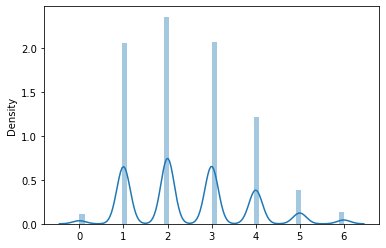

In [102]:
sns.distplot(len_vec) # Overall, the dist plot does not seem largely skewed

In [153]:
# Convert all sentences to 6 length vectors
train_q1_seq = pad_sequences(train_q1_seq, maxlen=max_len, padding='post')
train_q2_seq = pad_sequences(train_q2_seq, maxlen=max_len, padding='post')
val_q1_seq = pad_sequences(val_q1_seq, maxlen=max_len, padding='post')
val_q2_seq = pad_sequences(val_q2_seq, maxlen=max_len, padding='post')
test_q1_seq = pad_sequences(test_q1_seq, maxlen=max_len, padding='post')
test_q2_seq = pad_sequences(test_q2_seq, maxlen=max_len, padding='post')

In [154]:
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)

In [155]:
input_1 = Input(shape=(train_q1_seq.shape[1],))
input_2 = Input(shape=(train_q2_seq.shape[1],))


common_embed = Embedding(name="synopsis_embedd", input_dim=len(t.word_index)+1, 
                       output_dim=len(embeddings_index['no']), weights=[embedding_matrix], 
                       input_length=train_q1_seq.shape[1], trainable=False)
lstm_1 = common_embed(input_1)
lstm_2 = common_embed(input_2)


common_lstm = LSTM(64, return_sequences=True, activation="relu")
vector_1 = common_lstm(lstm_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(lstm_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x3 = Multiply()([x3, x3])

x1_ = Multiply()([vector_1, vector_1])
x2_ = Multiply()([vector_2, vector_2])
x4 = Subtract()([x1_, x2_])
    
    #https://stackoverflow.com/a/51003359/10650182
x5 = Lambda(cosine_distance, output_shape=cos_dist_output_shape)([vector_1, vector_2])
    
conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation="sigmoid", name='out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="binary_crossentropy", metrics=['acc', tf.keras.metrics.AUC()], optimizer=Adam(0.00001))

In [156]:
# Check model summary to see overview of model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 synopsis_embedd (Embedding)    (None, 6, 300)       62400       ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 6, 64)        93440       ['synopsis_embedd[0][0]',  

In [157]:
model.fit([train_q1_seq, train_q2_seq], y_train.values.reshape(-1,1), epochs = 10,
          batch_size=64, validation_data=([val_q1_seq, val_q2_seq], y_val.values.reshape(-1,1)))

Epoch 1/10
629/629 [==============================] - 22s 28ms/step - loss: 0.5823 - acc: 0.9182 - auc_1: 0.5454 - val_loss: 0.3891 - val_acc: 0.9415 - val_auc_1: 0.6016
Epoch 2/10
629/629 [==============================] - 17s 27ms/step - loss: 0.2986 - acc: 0.9398 - auc_1: 0.6294 - val_loss: 0.2577 - val_acc: 0.9415 - val_auc_1: 0.6483
Epoch 3/10
629/629 [==============================] - 16s 26ms/step - loss: 0.2389 - acc: 0.9398 - auc_1: 0.6844 - val_loss: 0.2246 - val_acc: 0.9415 - val_auc_1: 0.6993
Epoch 4/10
629/629 [==============================] - 17s 27ms/step - loss: 0.2165 - acc: 0.9398 - auc_1: 0.7313 - val_loss: 0.2070 - val_acc: 0.9415 - val_auc_1: 0.7438
Epoch 5/10
629/629 [==============================] - 17s 27ms/step - loss: 0.2029 - acc: 0.9398 - auc_1: 0.7688 - val_loss: 0.1954 - val_acc: 0.9414 - val_auc_1: 0.7784
Epoch 6/10
629/629 [==============================] - 19s 31ms/step - loss: 0.1928 - acc: 0.9398 - auc_1: 0.7985 - val_loss: 0.1861 - val_acc: 0.9414 

In [109]:
transform_text('what is the best dorms to live at')

(array([[28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0],
        [28, 67, 68,  0,  0,  0]], dtype=int32),
 array([[ 95,  25,   0,   0,   0,   0],
        [  2,   1,  53,   0

In [148]:
# Predict question class
np.argmax(model.predict(transform_text('how much does it cost to attend etown')))

4

In [158]:
model.save('snn.h5')

In [150]:
!zip -r /content/snn.zip /content/snn

  adding: content/snn/ (stored 0%)
  adding: content/snn/assets/ (stored 0%)
  adding: content/snn/saved_model.pb (deflated 89%)
  adding: content/snn/variables/ (stored 0%)
  adding: content/snn/variables/variables.index (deflated 63%)
  adding: content/snn/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/snn/keras_metadata.pb (deflated 89%)


In [151]:
with open('question_categories.pkl', 'wb') as f:
    pickle.dump(questions, f)